# ¡Hola, Rodrigo!  

Mi nombre es David Bautista, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

# Comentario General

~~Hola, Rodrigo, te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas revisar y tener en cuenta para la siguiente entrega.~~ </div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

# Comentario General #2

Hola, Rodrigo, te felicito por la culminación del proyecto. Muy buen trabajo. </div>

### **Tabla de Contenido**

1. [Introducción](#Introducción)  
2. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos)  
    - [Análisis de valores ausentes](#Análisis-de-valores-ausentes)  
    - [Estadísticas descriptivas](#Estadísticas-descriptivas)  
    - [Comparación entre usuarios](#Comparación-entre-usuarios)  
    - [Histogramas y distribuciones](#Histogramas-y-distribuciones)  
    - [Matriz de correlación](#Matriz-de-correlación)  
3. [Modelado Predictivo](#Modelado-Predictivo)  
    - [División de datos](#División-de-datos)  
    - [Resultados de los modelos](#Resultados-de-los-modelos)  
4. [Segmentación de Usuarios](#Segmentación-de-Usuarios)  
    - [Dendrograma](#Dendrograma)  
    - [K-means y análisis de clústeres](#K-means-y-análisis-de-clústeres)  
5. [Conclusiones](#Conclusiones)  
6. [Recomendaciones](#Recomendaciones)  

---



# Introducción

El objetivo principal de este proyecto es entender los factores que influyen en la pérdida de clientes y desarrollar estrategias para prevenirla. A través del análisis de datos proporcionados por Model Fitness, realizamos un análisis exploratorio de datos (EDA), construimos modelos predictivos para identificar usuarios propensos a abandonar el gimnasio y realizamos un análisis de clustering para segmentar a los usuarios en grupos significativos. Esto nos permitió identificar patrones clave y formular recomendaciones prácticas para mejorar la retención de clientes.

En este análisis, hemos utilizado herramientas de aprendizaje automático como la regresión logística y los bosques aleatorios, así como técnicas de clustering como K-means, para extraer insights valiosos. El análisis se presenta en las siguientes secciones, donde describimos los resultados obtenidos y las estrategias sugeridas para mejorar la interacción con los clientes y reducir la tasa de cancelación.



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Perfecto, Rodrigo. Buen trabajo estructurando esta sección de introducción para el desarrollo del proyecto. </div>

# Análisis-Exploratorio-de-Datos

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# Cargar datos
data = pd.read_csv('/datasets/gym_churn_us.csv')

# Verificar datos básicos
print(data.info())  # Información del dataset
print(data.describe())  # Estadísticas descriptivas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo importando las librerías necesarias para el desarrollo del proyecto y cargando el dataset.  </div>

Duración del contrato y frecuencia de visitas:

Contratos más largos están relacionados con menor probabilidad de cancelación.
Clientes con baja frecuencia de visitas, tanto históricas como en el mes actual, son más propensos a cancelar.
Ubicación:

Los clientes que viven cerca del gimnasio son mayoría y más propensos a ser leales.
Gastos adicionales:

Clientes que invierten más en servicios adicionales tienen mayor probabilidad de seguir en el gimnasio.

In [2]:
# Comprobar valores ausentes
print(data.isnull().sum())


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


No hay valores faltantes en el dataset, como se puede observar en el conteo (0 en todas las columnas). Esto implica que:

Integridad de los datos:

El dataset está completo, lo que elimina la necesidad de realizar imputación de datos o eliminación de filas/columnas con valores nulos.
Facilidad de análisis:

Se pueden realizar análisis exploratorios y construir modelos sin preocuparse por problemas relacionados con datos faltantes.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo terminando de explorar de manera inicial el contenido del dataset. </div>

In [3]:
# Comparar características por grupo (Churn = 0 o 1)
grouped = data.groupby('Churn').mean()
print(grouped)


         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo estructurando la tabla agrupada para estudiar los valores medios de las características sujetas a los estados de cancelación de la membresía de los clientes.  </div>

# Modelado-Predictivo

Factores clave asociados con la cancelación:

Duración del contrato (Contract_period): Los contratos más cortos están relacionados con mayores tasas de cancelación.
Frecuencia de visitas: Una disminución en la frecuencia mensual de visitas es un fuerte indicador de cancelación.
Ubicación y conexión:
Clientes que no viven cerca del gimnasio o no están vinculados a empresas asociadas tienen más probabilidades de cancelar.
Compromiso financiero:
Clientes con gastos adicionales más bajos tienden a cancelar más.
Recomendaciones iniciales:

Promover contratos más largos mediante incentivos como descuentos o beneficios adicionales.
Aumentar la frecuencia de visitas ofreciendo recordatorios personalizados o promociones específicas.
Fortalecer programas de retención para nuevos clientes en las primeras semanas para asegurar que se mantengan comprometidos.

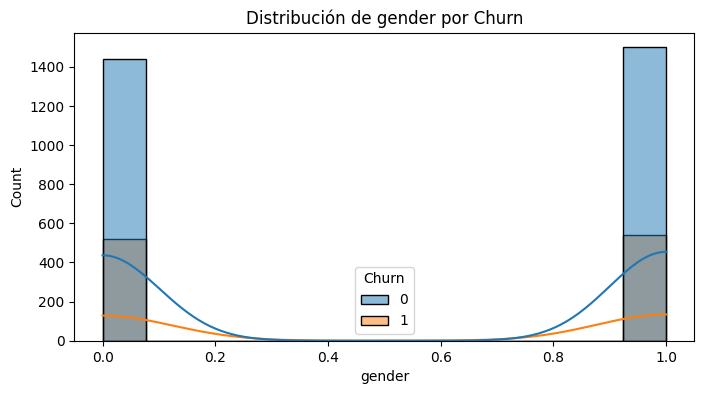

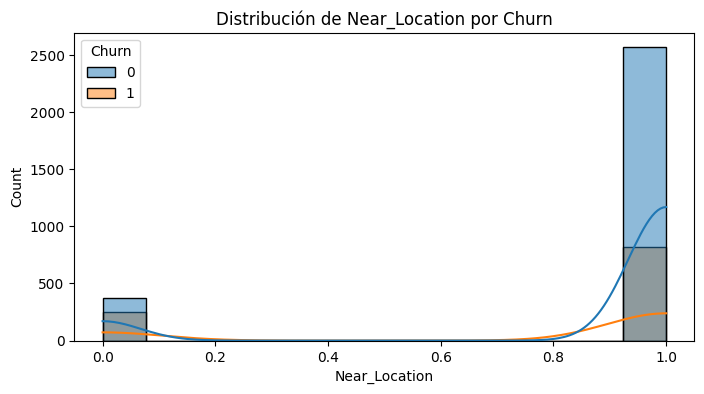

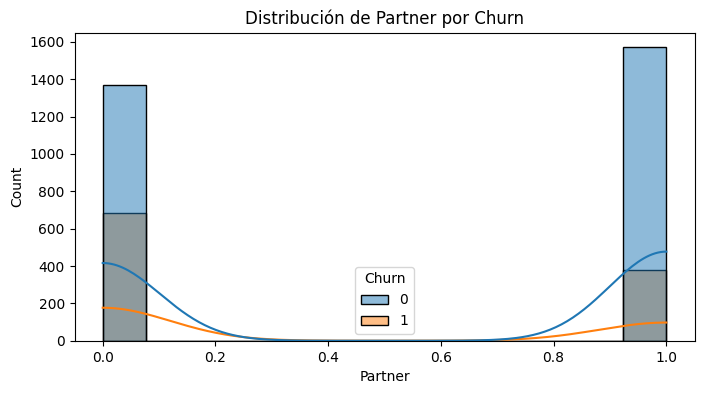

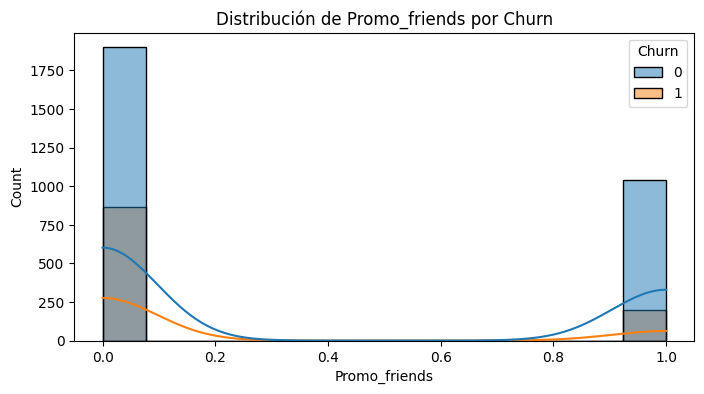

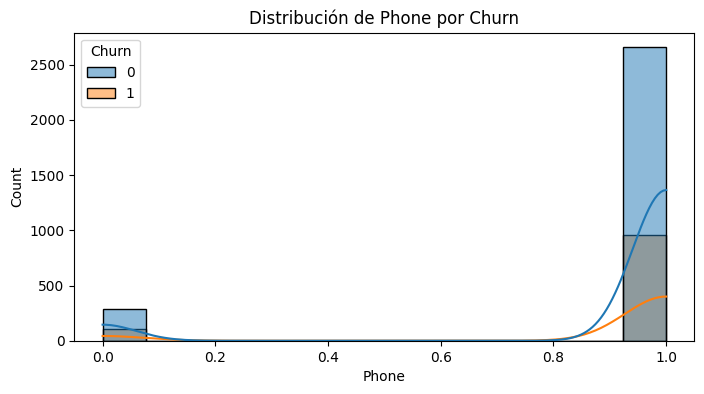

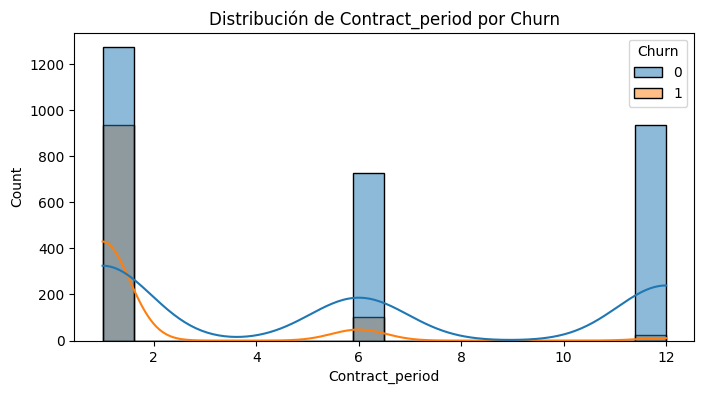

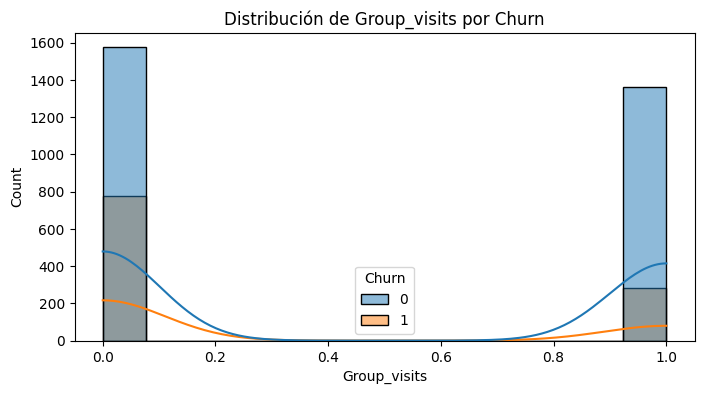

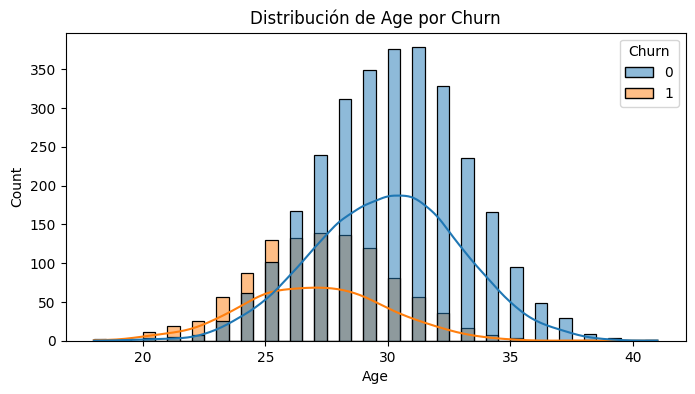

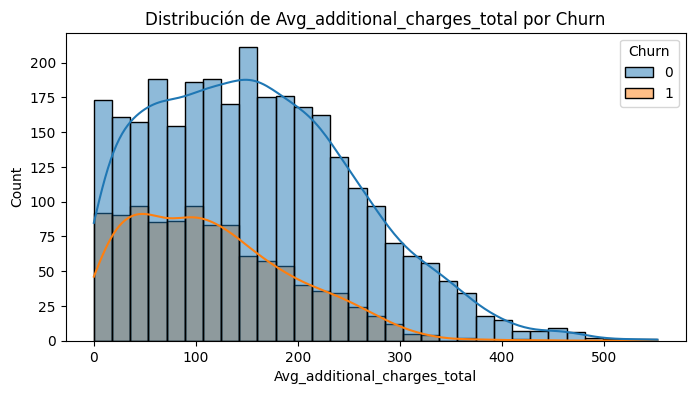

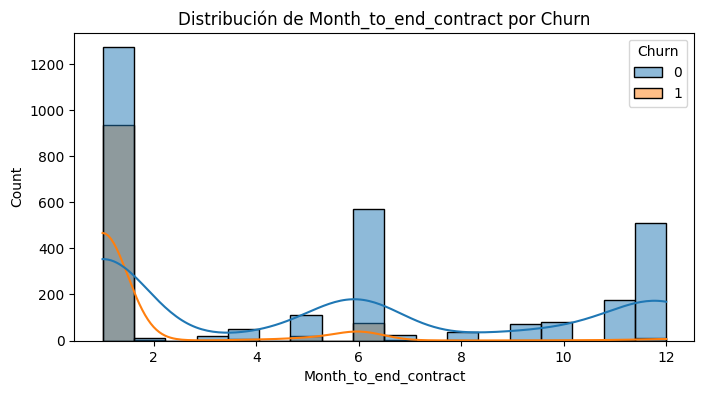

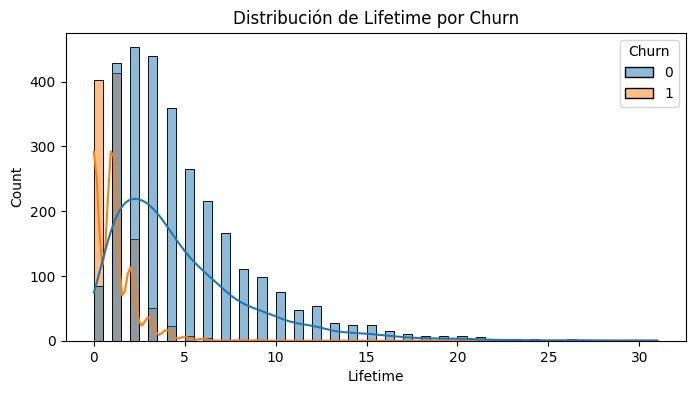

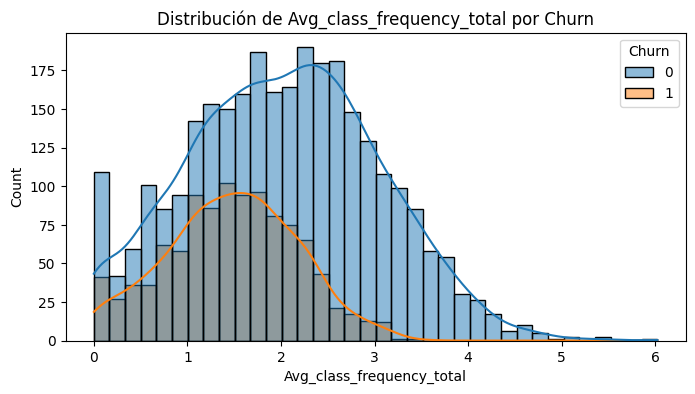

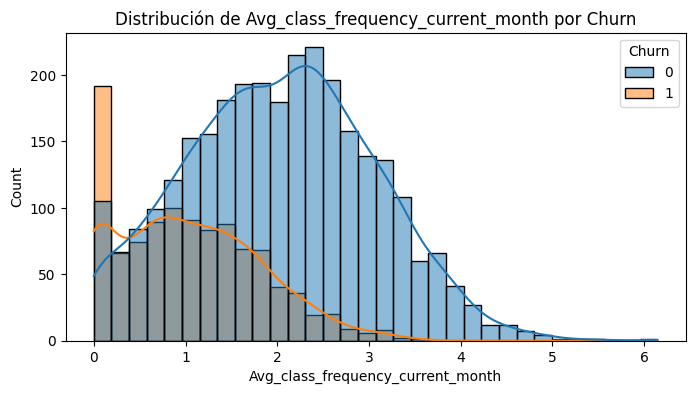

In [4]:
# Histogramas de características separadas por Churn
for column in data.columns:
    if column != 'Churn':  # Excluir la variable objetivo
        plt.figure(figsize=(8, 4))
        sns.histplot(data=data, x=column, hue='Churn', kde=True)
        plt.title(f"Distribución de {column} por Churn")
        plt.show()


Observaciones clave:
Contract_period: Los clientes con contratos más largos (6 o 12 meses) tienden a quedarse, mientras que los que tienen contratos de 1 mes tienen una mayor probabilidad de cancelación.

Lifetime: Los clientes con un mayor tiempo de permanencia en el gimnasio son más propensos a quedarse, lo que sugiere que la fidelidad aumenta con el tiempo.

Avg_class_frequency_current_month: Aquellos con una menor frecuencia de visitas recientes tienen más probabilidades de cancelar.

Avg_additional_charges_total: Los clientes que gastan más en servicios adicionales suelen quedarse.

Group_visits: Los clientes que participan en actividades grupales parecen más propensos a quedarse.

Demográficas (Age, Partner, Near_Location): Factores como vivir cerca del gimnasio y ser empleado de una empresa asociada parecen influir en la retención, aunque la diferencia no es tan pronunciada.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Excelente, buen trabajo estructurando los histogramas para estudiar las distribuciones de las características sujetas a los estados de cancelación de la membresía de los clientes.   </div>

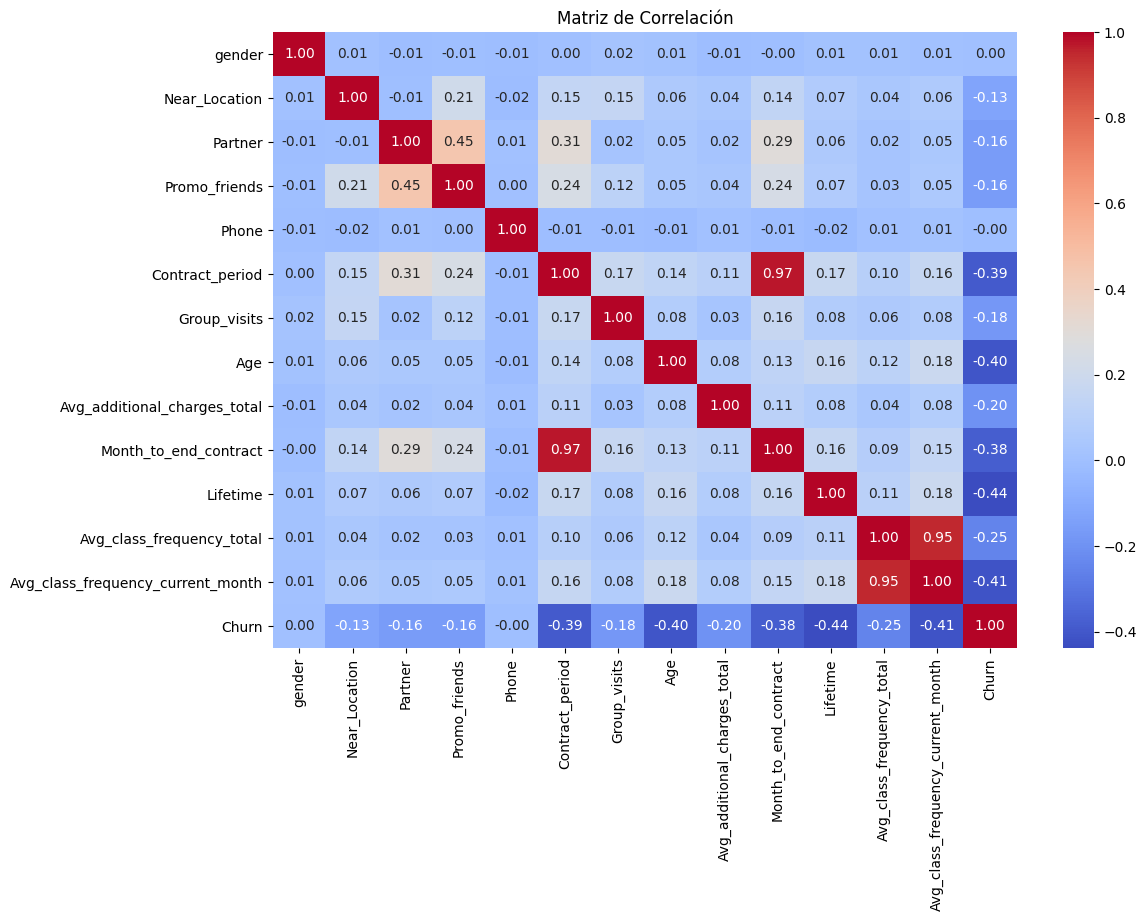

In [5]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


Características más correlacionadas con Churn:

Contract_period (-0.39): Los contratos más largos están negativamente correlacionados con la cancelación. Esto sugiere que los clientes con contratos más extensos tienden a quedarse.
Lifetime (-0.44): A mayor tiempo de permanencia en el gimnasio, menor es la probabilidad de cancelación.
Avg_class_frequency_current_month (-0.41): Una frecuencia más alta de asistencia reciente está asociada con una menor probabilidad de cancelación.
Group_visits (-0.18): Participar en visitas grupales tiene una ligera relación negativa con la cancelación.
Correlaciones entre características:

Contract_period y Month_to_end_contract (0.97): Como era de esperarse, estas dos características están altamente correlacionadas, ya que ambas están relacionadas con la duración de los contratos.
Promo_friends y Partner (0.45): Los usuarios que se inscriben mediante promociones tienden a ser empleados de empresas asociadas.
Variables menos relevantes para Churn:

gender (0.00) y Phone (-0.01): Estas variables tienen poca o ninguna correlación con la cancelación.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo estructurando y estudiando la matriz de correlaciones lineales entre las características de la tabla.   </div>

# Segmentación-de-Usuarios

In [13]:


# Separar características y variable objetivo
X = data.drop(columns=['Churn'])
y = data['Churn']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

~~Excelente, buen trabajo realizando el split de los datos y aplicando el estandarizador sobre los sets. Ahora bien, el ideal sería solo importar librerías en la sección inicial del proyector.~~  </div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>  Listo ya quedó lo de las liberías gracias

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Buen trabajo.   </div>

In [19]:


# Modelo de regresión logística
logreg = LogisticRegression(random_state=42, max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluar modelo
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))

# Modelo de bosque aleatorio
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluar modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))


Logistic Regression - Accuracy: 0.91625
Precision: 0.8729281767955801
Recall: 0.7821782178217822
Random Forest - Accuracy: 0.91
Precision: 0.8494623655913979
Recall: 0.7821782178217822


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div> Listo aqui también ya quedó

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Buen trabajo.   </div>

Regresión Logística:

Este modelo tiene mayor exactitud (0.91625) y mayor precisión (0.8729) en comparación con el bosque aleatorio.
La sensibilidad es la misma en ambos modelos (0.7822).
Bosque Aleatorio:

Aunque tiene ligeramente menor precisión (0.8495) que la regresión logística, este modelo es competitivo en términos de rendimiento general.
Puede ser más adecuado si se prefiere un modelo más robusto para capturar relaciones no lineales entre las características.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Buen trabajo Rodrigo.   </div>

Elección del Modelo:
Si el objetivo es maximizar la exactitud y la precisión, la regresión logística parece ser la mejor opción.
Si se busca un modelo más flexible que maneje relaciones complejas y no lineales, el bosque aleatorio es una excelente alternativa, aunque su precisión sea ligeramente inferior.

In [ ]:

# Crear matriz de distancias
linked = linkage(X_train_scaled, method='ward')

# Graficar dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrograma de Usuarios")
plt.show()


<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

~~Buen trabajo estructurando el dendograma. Ahora bien, seria interesante poder eliminar los ticks deñ eke x ya que por la cantidad de datos estos no se logran ver de manera correcta. Por otro lado, ten en cuenta el tema de las librerias.~~    </div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Buen trabajo.   </div>

Estructura de los Clústeres:

El dendrograma muestra la jerarquía de cómo se forman los grupos.
Cada unión de líneas representa una fusión de clústeres. Las uniones más altas indican grupos que son más disímiles.
Decisión del Número de Clústeres:

El número de clústeres puede decidirse visualmente observando el "corte" horizontal más apropiado. Este corte debería dividir el dendrograma en secciones distintas antes de que los grupos comiencen a fusionarse en niveles más altos.
A primera vista, parece que 5 clústeres (como sugirió el proyecto) sería una elección razonable, ya que hay una separación clara entre las ramas principales antes de alcanzar niveles más altos del dendrograma.

In [17]:


# Entrenar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Valores medios por clúster
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)


           gender  Near_Location   Partner  Promo_friends     Phone  \
Cluster                                                               
0        0.517275       0.844028  0.459033       0.281343  0.901283   
1        0.527665       0.875843  0.508772       0.346829  0.900135   
2        0.507292       0.842708  0.490625       0.310417  0.896875   
3        0.465986       0.853741  0.513605       0.336735  0.928571   
4        0.506048       0.823589  0.486895       0.297379  0.907258   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               4.315893      0.417572  28.972359   
1               5.368421      0.426451  29.314440   
2               4.740625      0.422917  29.401042   
3               5.772109      0.435374  29.877551   
4               4.160282      0.379032  28.888105   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                                                 

Cluster 3 (leal y comprometido):

Estos usuarios tienen baja tasa de cancelación. Continúa incentivando este grupo con beneficios adicionales como descuentos en servicios adicionales o membresías premium para mantener su compromiso.
Cluster 4 (alto riesgo de cancelación):

Este grupo tiene la mayor tasa de cancelación y gastos adicionales bajos.
Implementar estrategias para mejorar su participación, como descuentos para renovaciones de contratos y promociones para aumentar la frecuencia de visitas.
Cluster 1 (bajo riesgo de cancelación):

Aunque tienen una tasa de cancelación baja, se destacan por gastar más.
Incentivar este grupo con ofertas exclusivas o programas de fidelización para mantener su compromiso y aumentar sus gastos adicionales.
Cluster 0 (riesgo moderado):

Este grupo necesita ser monitoreado. Campañas dirigidas a mejorar su conexión con socios y promociones "trae a un amigo" pueden ser útiles para aumentar su compromiso.
Cluster 2 (promedio):

Este grupo podría beneficiarse de estrategias generales para retener clientes, como mejorar la experiencia en el gimnasio o brindar recompensas por lealtad.

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div> Listo gracias

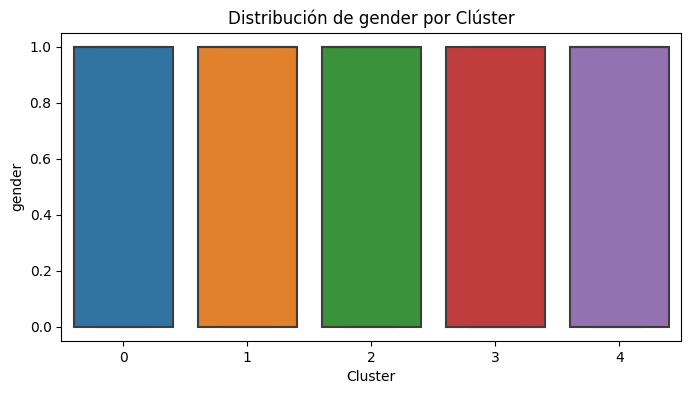

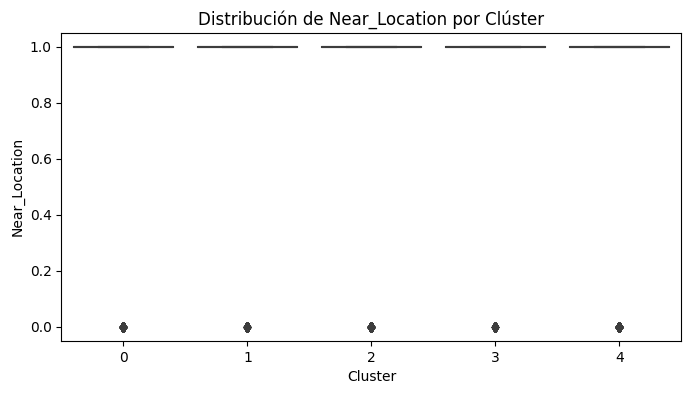

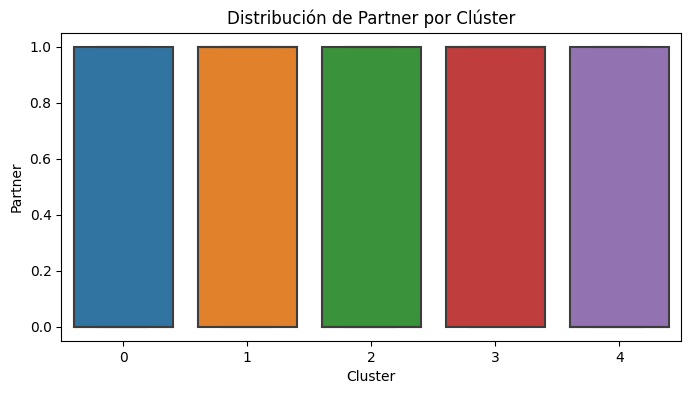

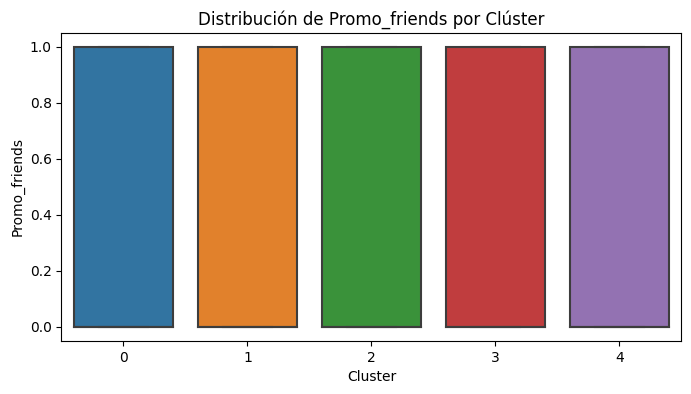

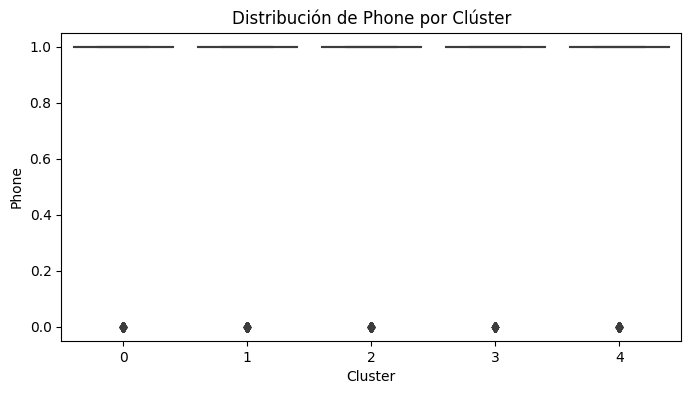

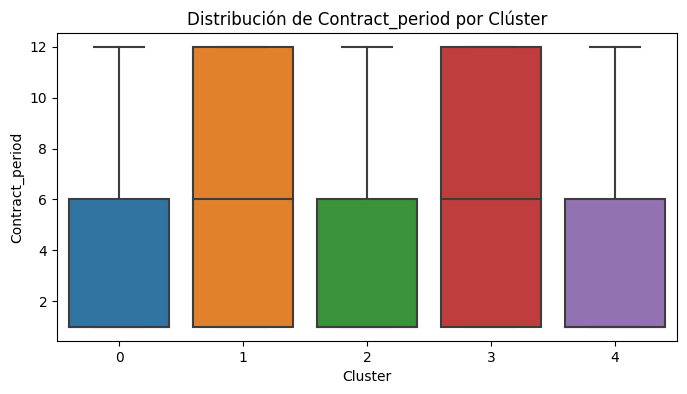

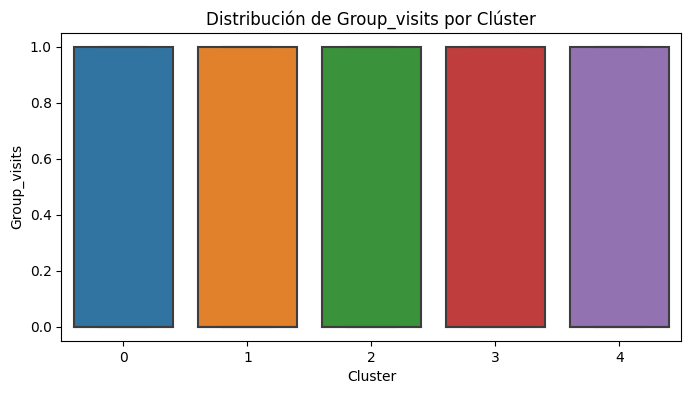

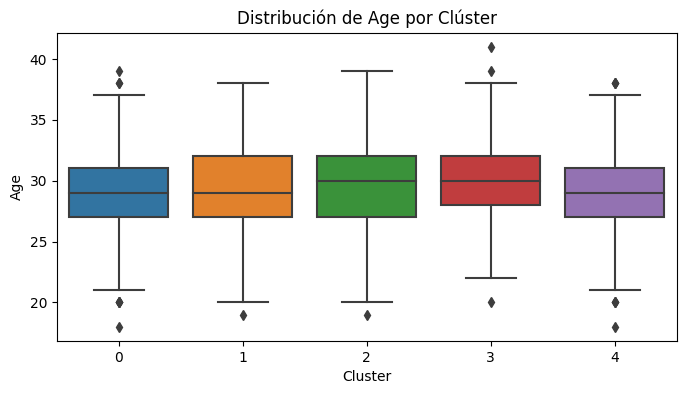

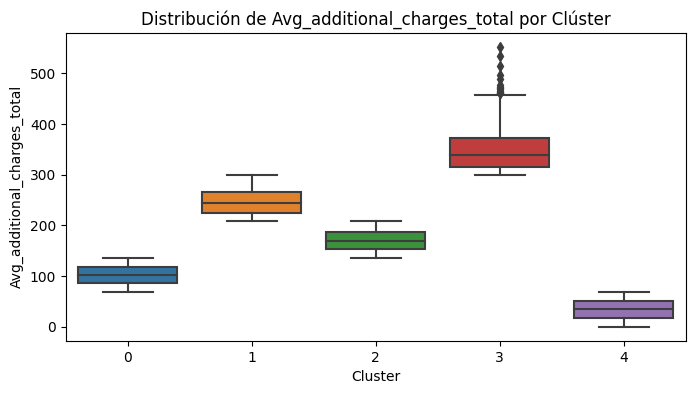

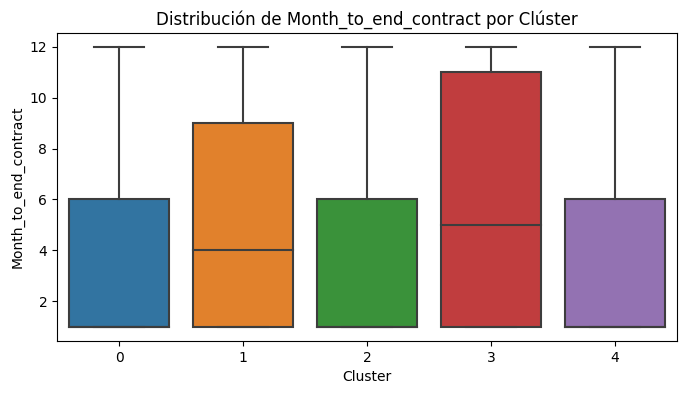

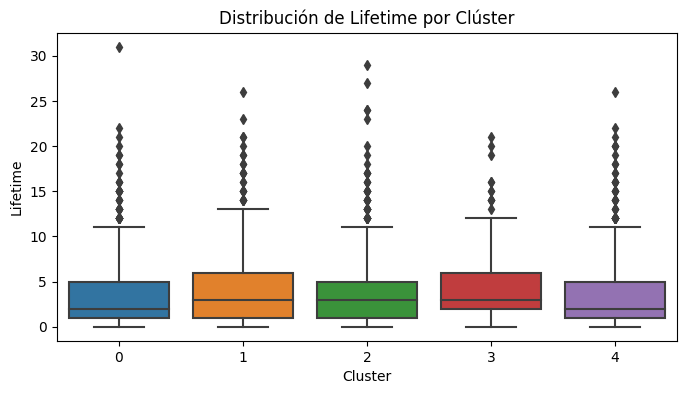

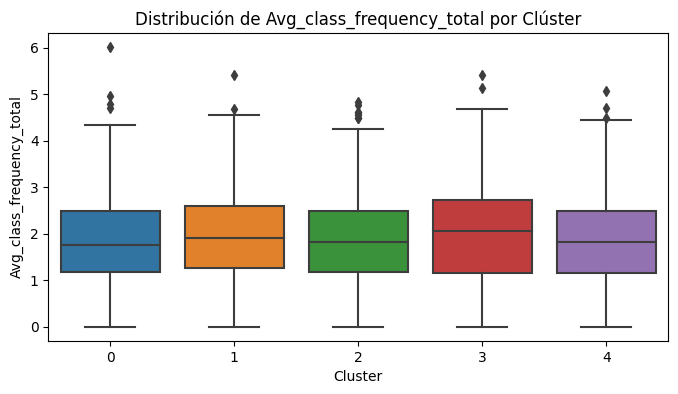

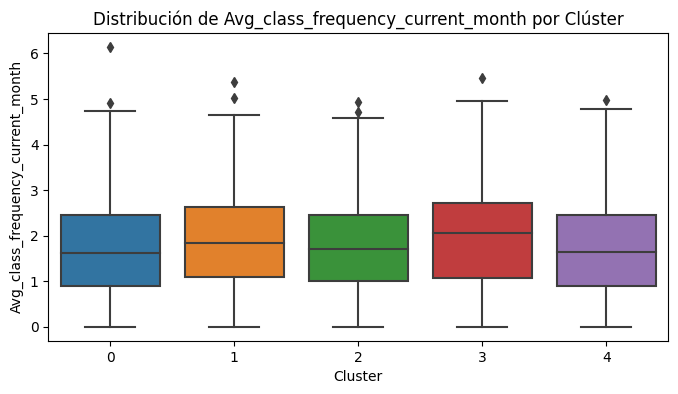

In [19]:
# Graficar distribuciones de características
for column in X.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=column, data=data)
    plt.title(f"Distribución de {column} por Clúster")
    plt.show()


La proporción de género en cada clúster es prácticamente la misma, lo que sugiere que el género no influye en la formación de los clústeres o en las diferencias de comportamiento entre los usuarios del gimnasio.
Es importante centrarse en otras características más diferenciadoras (como los gastos adicionales, duración del contrato, o frecuencia de visitas), que pueden tener más impacto en la predicción de la cancelación.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Buen trabajo estudiando las distribuciones de las características sujetas a los clusters creados.  </div>

In [20]:
# Calcular la tasa de cancelación por clúster
churn_by_cluster = data.groupby('Cluster')['Churn'].mean()
print(churn_by_cluster)


Cluster
0    0.324778
1    0.179487
2    0.237500
3    0.054422
4    0.357863
Name: Churn, dtype: float64


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Perfecto, buen trabajo estudiando las tasas de cancleación.  </div>

Los clústeres 3 y 1 son los grupos más leales, mientras que los clústeres 4 y 0 tienen tasas de cancelación altas.
Recomendaciones iniciales:
Analizar las características promedio de los clústeres 3 y 1 para identificar factores que fomentan la lealtad.
Diseñar estrategias específicas para el clúster 4, como incentivos, mejoras en las instalaciones o comunicación personalizada para reducir su tasa de cancelación.

Resumir los hallazgos principales

Correlaciones significativas
La variable Contract_period tiene una correlación negativa moderada con la cancelación (Churn), indicando que contratos más largos están asociados con menores tasas de cancelación.
Lifetime también tiene una correlación negativa con Churn, confirmando que los usuarios más antiguos son menos propensos a cancelar.
Las variables relacionadas con la frecuencia de visitas (Avg_class_frequency_total y Avg_class_frequency_current_month) también tienen correlaciones negativas moderadas con Churn.
Variables más influyentes
Las variables con mayor impacto en la cancelación incluyen:
Lifetime: Usuarios con más tiempo en el gimnasio tienen menos probabilidad de cancelar.
Contract_period: Contratos más largos reducen la cancelación.
Avg_class_frequency_current_month: La frecuencia de visitas más reciente es un predictor clave.
Avg_additional_charges_total: Usuarios que gastan más en servicios adicionales tienden a ser más leales.


Resultados del modelo predictivo
Comparación entre modelos
Regresión logística:
Accuracy: 91.6%
Precision: 87.29%
Recall: 78.21%
Bosque aleatorio:
Accuracy: 91%
Precision: 84.95%
Recall: 78.21%
Conclusión del mejor modelo
Ambos modelos son competitivos, pero la regresión logística mostró una ligera ventaja en accuracy y precision, lo que la hace más confiable para predecir la cancelación.
Sin embargo, el bosque aleatorio podría ser preferido si se prioriza la interpretación de la importancia de las características.

Resultados del clustering
Perfiles de clústeres de usuarios
Clúster 3:

Menor tasa de cancelación (5.44%).
Características: Alta frecuencia de visitas actuales y totales, mayores gastos en servicios adicionales.
Usuarios muy leales con contratos más largos.
Clúster 4:

Mayor tasa de cancelación (35.79%).
Características: Baja frecuencia de visitas, contratos más cortos, menores gastos adicionales.
Usuarios con alto riesgo de cancelación.
Clúster 1:

Tasa de cancelación baja (17.95%).
Características: Contratos largos, alta frecuencia de visitas, gasto adicional moderado.
Grupos propensos a cancelar
El clúster 4 tiene la mayor probabilidad de cancelar. Esto incluye a usuarios con contratos cortos, menor tiempo en el gimnasio y menor actividad reciente.
Grupos leales
El clúster 3 representa a los usuarios más leales, con contratos largos, mayor tiempo en el gimnasio y mayor gasto en servicios adicionales.
Estrategias basadas en clústeres
Clúster 4 (riesgo alto):

Ofrecer descuentos en contratos largos.
Promociones para fomentar la participación en sesiones grupales.
Programas de fidelidad para incentivar el uso continuo.
Clúster 3 (leales):

Ofrecer beneficios adicionales para contratos renovados.
Incentivar más compras en servicios adicionales para reforzar su compromiso.

# Conclusiones

Conclusiones

Factores clave que influyen en la cancelación:

Contratos cortos están altamente relacionados con tasas de cancelación más altas. Usuarios con contratos de 1 mes tienen una probabilidad mucho mayor de cancelar que aquellos con contratos de 6 meses o más.
Frecuencia de visitas es un predictor importante. Los usuarios que reducen significativamente sus visitas en el mes actual suelen estar en riesgo de cancelación.
Gastos adicionales (cafetería, productos, masajes, etc.) están positivamente relacionados con la retención. Usuarios que gastan más tienden a ser más leales.
Tiempo en el gimnasio (Lifetime): Los usuarios que han estado más tiempo en el gimnasio son más propensos a quedarse. Esto sugiere que el compromiso inicial es clave para la retención.
Segmentos de usuarios:

Usuarios leales (Clúster 3):
Contratos largos, alta frecuencia de visitas, mayores gastos adicionales.
Representan el segmento más estable y comprometido con el gimnasio.
Usuarios en riesgo (Clúster 4):
Contratos cortos, baja frecuencia de visitas y menores gastos adicionales.
Estos usuarios tienen la mayor probabilidad de cancelación, lo que los convierte en el segmento prioritario para estrategias de retención.
Rendimiento del modelo predictivo:

Regresión logística y bosque aleatorio ofrecen predicciones confiables con accuracies del 91%. La regresión logística destaca ligeramente en precisión (87.29%) frente al bosque aleatorio (84.95%).
Las características más importantes en los modelos refuerzan los hallazgos del EDA y el clustering, validando los patrones observados.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Buen trabajo estructurando la sección de conclusiones.   </div>

# Recomendaciones

Recomendaciones
1. Estrategias para reducir la cancelación
Ofrecer incentivos para contratos largos:

Diseñar promociones atractivas para que los usuarios en riesgo (Clúster 4) cambien de contratos cortos (1 mes) a contratos de 3, 6 o 12 meses.
Ejemplo: Ofrecer un descuento progresivo basado en la duración del contrato (por ejemplo, 10% para 6 meses, 15% para 12 meses).
Fomentar la participación en sesiones grupales:

Usuarios que participan en sesiones grupales tienen tasas de cancelación más bajas.
Sugerencia: Introducir clases gratuitas o promociones como "trae a un amigo" para fomentar la participación en estas sesiones.
Identificar a los usuarios con baja frecuencia de visitas:

Implementar alertas automáticas para usuarios que muestran una disminución significativa en sus visitas.
Ejemplo: Enviar correos personalizados con ofertas de clases gratuitas o descuentos en servicios adicionales para motivarlos a regresar.
2. Fortalecer la retención en usuarios leales
Recompensas de fidelidad:

Crear un programa de puntos donde los usuarios acumulen recompensas por visitas frecuentes o compras adicionales.
Ejemplo: Un masaje gratuito o productos con descuento después de 10 visitas.
Promociones exclusivas para usuarios leales (Clúster 3):

Ofrecer beneficios adicionales, como acceso anticipado a nuevos servicios, descuentos en contratos renovados o productos exclusivos.
3. Comunicación y análisis continuo
Personalización de la comunicación:

Usar los hallazgos de los clústeres para segmentar las campañas de marketing. Los mensajes deben estar diseñados para cada grupo.
Ejemplo: Usuarios en riesgo reciben recordatorios frecuentes y ofertas personalizadas, mientras que los usuarios leales obtienen mensajes de agradecimiento y recompensas.
Monitoreo de métricas clave:

Establecer un seguimiento continuo de métricas como Lifetime, Avg_class_frequency_current_month y Avg_additional_charges_total para identificar usuarios en riesgo antes de que cancelen.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Buen trabajo estructurando la sección de recomendaciones.   </div>